In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
from sklearn.decomposition import PCA
import numpy as np            # Data manipulation
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

In [2]:
df = pd.read_csv(r'../rating/Numeric Rating - Sheet1.csv', header=1)
df

,Company name,Flaring Intensity,Methane,GHG,Zero Carbon,Renewable energy,Carbon Emission,"Forest, wetland, peatlands",Plastic,Carbon Neutral,recycled product,Supplier proof,Water use,Landfill use,Paper use,Palm,Air travel,Final Rating
0,Amazon,NaN,NaN,NaN,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,Apple,NaN,NaN,NaN,2.0,5.0,5.0,NaN,1.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,4
2,BAC,NaN,NaN,NaN,3.0,6.0,8.0,NaN,NaN,0.0,4.0,1.0,5.0,2.0,2.0,NaN,NaN,5
3,BASF,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0,NaN,1.0,0.0,NaN,NaN,1.0,NaN,2
4,Blackrock,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,6.0,1.0,NaN,1.0,4
5,Boeing,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,0.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,3
6,Chevron,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,Cisco,NaN,NaN,3.0,NaN,NaN,4.5,NaN,2.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3
8,Exxon,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,Facebook,NaN,NaN,8.0,2.0,6.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [3]:
df_subset = df.drop(['Company name', 'Final Rating'], axis=1)
df_subset = df_subset.fillna(0)

In [10]:
ss = StandardScaler()
df_subset = ss.fit_transform(df_subset)

In [11]:
pca = PCA(n_components=2)
pca.fit(df_subset)

pca_df = pd.DataFrame(data=pca.transform(df_subset))
# pca_df['Company name'] = df['Company name']
pca_df

,0,1
0,-0.185455,-0.451318
1,3.351171,-1.557100
2,6.668519,-0.581999
3,0.069915,0.862100
4,2.757832,3.298887
5,0.336002,-0.181242
6,-3.342356,-2.674647
7,0.977351,-0.595434
8,-2.704742,-2.016257
9,1.617283,-0.922253


In [14]:
#K means Clustering 
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(pca_df, 4)
kmeans = pd.DataFrame(clust_labels)
pca_df.insert((pca_df.shape[1]),'kmeans',kmeans)
pca_df['Company name'] = df['Company name']
pca_df

,0,1,kmeans,Company name
0,-0.185455,-0.451318,0,Amazon
1,3.351171,-1.557100,1,Apple
2,6.668519,-0.581999,1,BAC
3,0.069915,0.862100,0,BASF
4,2.757832,3.298887,2,Blackrock
5,0.336002,-0.181242,0,Boeing
6,-3.342356,-2.674647,3,Chevron
7,0.977351,-0.595434,0,Cisco
8,-2.704742,-2.016257,3,Exxon
9,1.617283,-0.922253,1,Facebook


<AxesSubplot:xlabel='0', ylabel='1'>

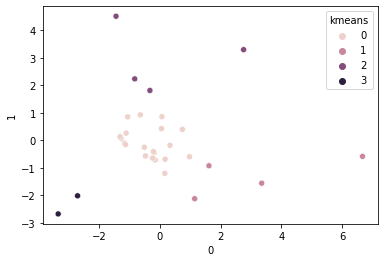

In [17]:
sns.scatterplot(data=pca_df, x=pca_df[0], y=pca_df[1], hue=pca_df['kmeans'])

In [18]:
pca_df.to_csv('../rating/clustering_pca_results.csv')

In [7]:
# df.to_csv('../rating/companies_clustered_by_rating.csv')